<h1><font  color="#cc0052">SOUDANI JAWHER TP3</font></h1>


<h1><font  color="#cc0052">SOUDANI JAWHER TP3</font></h1>


# Import libraries 

In [127]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline

# Read data

In [128]:
dataframe  = pd.read_csv('train.csv', sep=";")

# Show data

In [129]:
dataframe.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# Show data info

In [130]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
age               2999 non-null int64
job               2999 non-null object
marital           2999 non-null object
education         2999 non-null object
default           2999 non-null object
housing           2999 non-null object
loan              2999 non-null object
contact           2999 non-null object
month             2999 non-null object
day_of_week       2999 non-null object
duration          2999 non-null int64
campaign          2999 non-null int64
pdays             2999 non-null int64
previous          2999 non-null int64
poutcome          2999 non-null object
emp.var.rate      2999 non-null float64
cons.price.idx    2999 non-null float64
cons.conf.idx     2999 non-null float64
euribor3m         2999 non-null float64
nr.employed       2999 non-null float64
y                 2999 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 492.1+ KB
None


In [131]:
dataframe.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Transform categorical data to numeric values 

In [ ]:
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
data_1 = dataframe[cols]
data_dummies = pd.get_dummies(data_1)
result_df = pd.concat([data_dummies, dataframe.drop(cols,axis=1)], axis=1)
result_df.head()

# Transform prediction to binary numbers

In [133]:
result_df['output'] = result_df['y'].apply(lambda x: 1 if x =='yes' else 0)

In [134]:
#from pandas.tools.plotting import scatter_matrix
##scatter_matrix(result_df,figsize=(10,10))
#plt.show()

# Calculating correlations matrix

In [135]:
correlations = result_df.corr()

In [136]:
correlations.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutco

# Plotting Correlation matrix

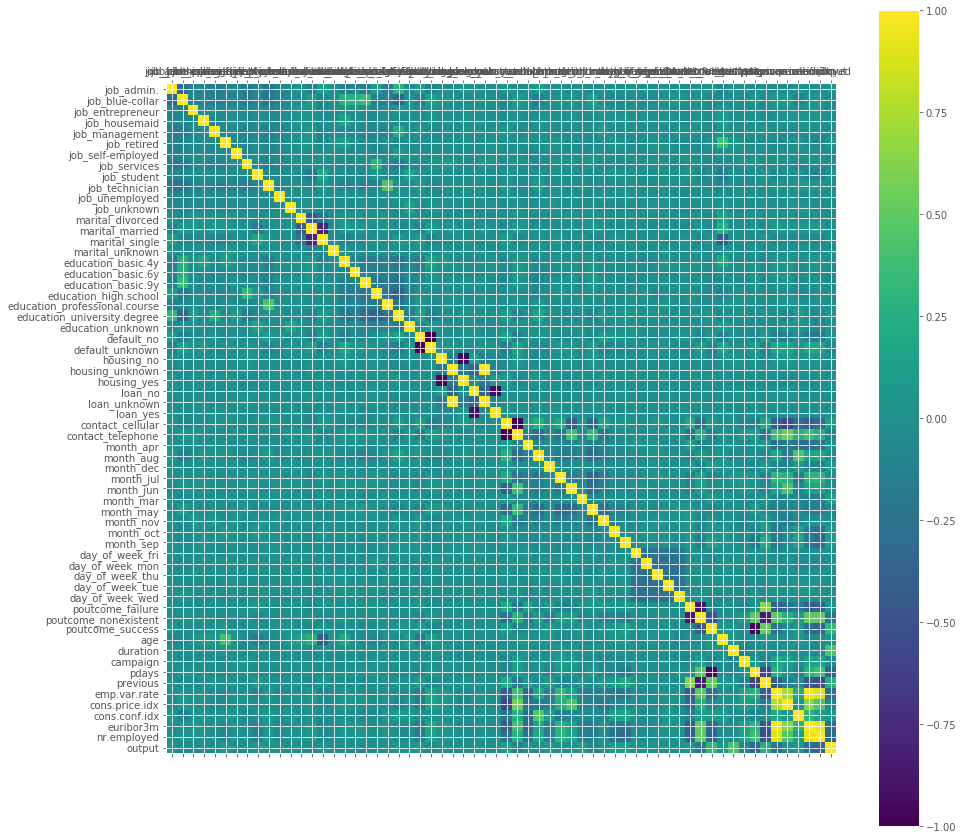

In [137]:
names = correlations.columns.tolist()
# plot correlation matrix
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Reducing features based on correlations with output class 

In [138]:
correlations[correlations['output']>0.05]['output']

job_retired         0.076498
default_no          0.063415
contact_cellular    0.127740
month_dec           0.085156
month_mar           0.128306
month_oct           0.099953
month_sep           0.112043
poutcome_success    0.323562
age                 0.059584
duration            0.432896
previous            0.261133
output              1.000000
Name: output, dtype: float64

In [139]:
high_correlations=correlations.iloc[-1][abs(correlations.iloc[-1]>0.05) ]

# Plotting new correlation matrix

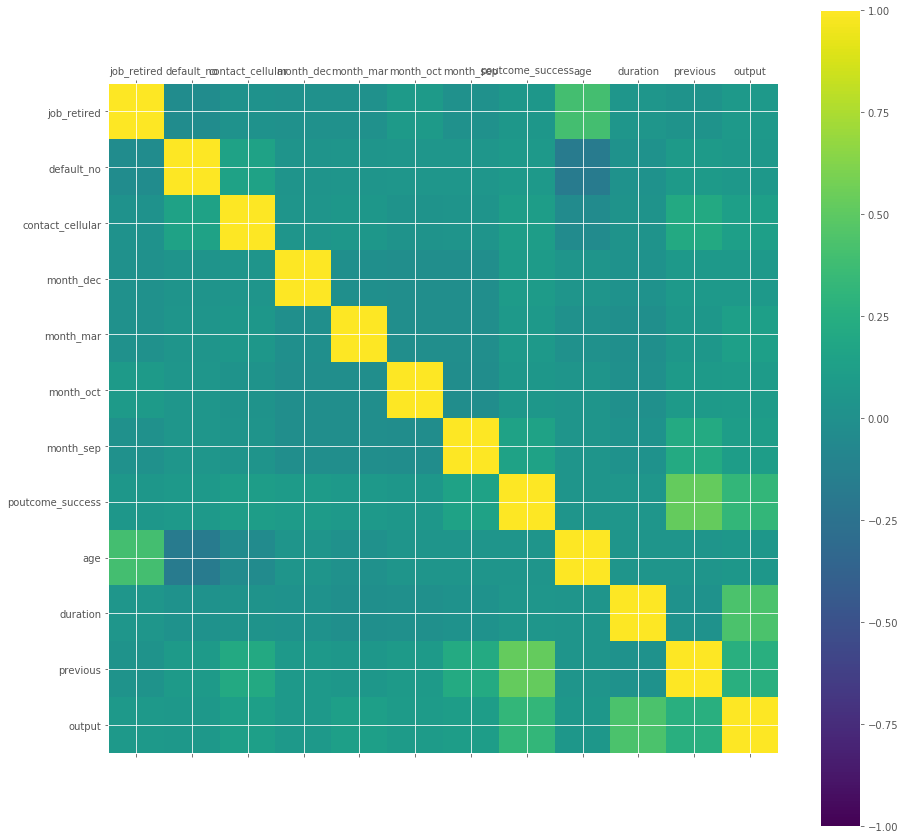

In [142]:
high_correlations_plot=correlations[abs(correlations.iloc[-1]>0.05) ]
high_correlations_plot=high_correlations_plot[high_correlations_plot.index]
names = high_correlations_plot.columns.tolist()

# plot correlation matrix
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(high_correlations_plot, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# Features Selection and Data preparation

In [143]:
index_features=high_correlations.index[:-1]
index_features

Index(['job_retired', 'default_no', 'contact_cellular', 'month_dec',
       'month_mar', 'month_oct', 'month_sep', 'poutcome_success', 'age',
       'duration', 'previous'],
      dtype='object')

In [144]:
#frequencies = pd.crosstab( result_df[ "month"], result_df[ "y"]).apply(lambda r: r/len(result_df))
#print frequencies
#sns.heatmap( frequencies)

In [145]:
X=result_df[index_features].values
y=result_df['output'].values

# Model building and params selection with cross_validation

In [146]:
clf = RandomForestClassifier(n_estimators=30, random_state=0)

In [ ]:
#from sklearn.cross_validation import cross_val_score
#np.random.seed(1)
#ret_scores=[]

#for n in range(3):
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#    model = clf = RandomForestClassifier(n_estimators=30, random_state=0)

    # Evaluate the models using crossvalidation
#    scores = cross_val_score(model, X_test, y_test, scoring="accuracy", cv =10)
#    for s in scores:
#        ret_scores.append(s)


# Data splitting for model evaluation 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit( X_train, y_train)
y_predict=clf.predict(X_test)

In [148]:
accuracy_score(y_test,y_predict)

0.89500000000000002

# Model training

In [149]:
clf.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Final Test Data Preparation (same steps)

In [150]:
dataframe2  = pd.read_csv('test.csv', sep=";",header=None)
dataframe2.head(5)
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 21 columns):
age               2999 non-null int64
job               2999 non-null object
marital           2999 non-null object
education         2999 non-null object
default           2999 non-null object
housing           2999 non-null object
loan              2999 non-null object
contact           2999 non-null object
month             2999 non-null object
day_of_week       2999 non-null object
duration          2999 non-null int64
campaign          2999 non-null int64
pdays             2999 non-null int64
previous          2999 non-null int64
poutcome          2999 non-null object
emp.var.rate      2999 non-null float64
cons.price.idx    2999 non-null float64
cons.conf.idx     2999 non-null float64
euribor3m         2999 non-null float64
nr.employed       2999 non-null float64
y                 2999 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 492.1+ KB
None


In [151]:
dataframe2.columns=dataframe.columns.tolist()[:-1]

In [152]:
data_2 = dataframe2[cols]
data_dummies2 = pd.get_dummies(data_2)
result_df2 = pd.concat([data_dummies2, dataframe2.drop(cols,axis=1)], axis=1)
result_df2.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,0,1,0,0,0,0,0,...,49,144,5,999,0,1.4,93.918,-42.7,4.963,5228.1
1,1,0,0,0,0,0,0,0,0,0,...,31,182,8,999,0,1.1,93.994,-36.4,4.858,5191.0
2,1,0,0,0,0,0,0,0,0,0,...,31,80,1,999,1,-1.8,92.893,-46.2,1.281,5099.1
3,1,0,0,0,0,0,0,0,0,0,...,60,482,2,999,0,-1.8,93.075,-47.1,1.365,5099.1
4,0,1,0,0,0,0,0,0,0,0,...,33,87,2,999,2,-1.8,93.075,-47.1,1.405,5099.1


In [153]:
X_final_test=result_df2[index_features].values

# Final prediction

In [154]:
y_final_test=clf.predict(X_final_test)

In [155]:
final_index=np.arange(1,len(y_final_test)+1)
result = np.c_[final_index.astype(int), y_final_test.astype(int)]
df_result_predict = pd.DataFrame(result[:,0:2], columns=['Id', 'prediction'])

In [156]:
df_result_predict.head()

,Id,prediction
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [157]:
df_result_predict.to_csv('jawher.csv', index=False)